In [1]:
import numpy as np
import pickle
import dm_den
import dm_den_viz
import paths
import copy

from importlib import reload
from UCI_tools import staudt_tools

from astropy import units as u
from astropy.units import cds
cds.enable()

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib import rcParams
from matplotlib.lines import Line2D

rcParams['mathtext.fontset'] = 'dejavuserif'
rcParams['font.family'] = 'serif' 
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
rcParams['axes.grid'] = False
rcParams['axes.titlesize']=20
rcParams['axes.labelsize']=17
rcParams['axes.titlepad']=15
rcParams['legend.frameon'] = True
rcParams['legend.facecolor']='white'
rcParams['legend.fontsize']=14
rcParams['figure.facecolor']='white'

In [3]:
disp_label = '$\\sigma_\mathrm{DM}\,/\,'\
             '\\left[\mathrm{km\,s^{-1}}\\right]$'

In [4]:
#den_disp_dict = dm_den.den_disp_phi_bins('dm_stats_20220715.h5',
#                                         'den_disp_dict_20220818.pkl')
#fname = paths.data + 'den_disp_dict_20220818.pkl'

fname = paths.data + 'den_disp_dict_N15_dz0.5_20230707.pkl'
with open(fname, 'rb') as f:
    den_disp_dict_N15_dz05 = pickle.load(f)

fname = paths.data + 'den_disp_dict_N30_dz1.0_20230707.pkl'
with open(fname, 'rb') as f:
    den_disp_dict_N30_dz1 = pickle.load(f)

In [5]:
def msun_kpc_to_gev(x):
    x = copy.deepcopy(x)
    x *= u.M_sun / u.kpc ** 3.
    x = x.to(u.GeV / cds.c ** 2. / u.cm ** 3.)
    return x.value

In [6]:
def vs_phi(tgt, den_disp_dict, df_source):
    df = dm_den.load_data(df_source)
    fig,axs = plt.subplots(3, 5, figsize=(10,6), sharey=True, sharex=True,
                           dpi=110)
    fig.subplots_adjust(wspace=0.0, hspace=0.0)
    axs = axs.ravel()  

    axs[-3].set_xlabel('$\phi$ [rad]')
    if tgt=='den':
        axs[5].set_ylabel('$\\rho_\mathrm{DM}\,'
                          '/\,\left[\mathrm{GeV\,cm^{-3}}\\right]$')
    elif tgt=='disp':
        axs[5].set_ylabel('$\log\\left('+disp_label.replace('$','')+'\\right)$')

    for k, galname in enumerate(df.index):
    #for k, galname in enumerate(['m12f']):
        phi_bins = den_disp_dict[galname]['phi_bins']
            
        if tgt=='den':
            col = 'den_disc'
            x = den_disp_dict[galname]['dens']
            x = msun_kpc_to_gev(x)
            avg = msun_kpc_to_gev(df.loc[galname, col])
            #axs[0].set_ylim(6.5, 7.4)
            axs[0].set_ylim(0.1, 0.8)
            #axs[0].set_ylim(0.35, 0.55)
            #print(x.min() / avg - 1.)
            
        elif tgt=='disp':
            col = 'disp_dm_disc_cyl'
            x = den_disp_dict[galname]['disps']
            avg = df.loc[galname, col]
            x = np.log10(x)
            avg = np.log10(avg)
            axs[0].set_ylim(2.1,2.65)
        axs[k].bar(phi_bins[:-1], x, align='edge',  
                   width=(phi_bins[1]-phi_bins[0])*0.8)      
        axs[k].axhline(avg, color='k')
        
        axs[k].tick_params(axis='both', which='major', labelsize=12)

        axs[k].annotate(galname,
                        (0.04, 0.96),
                        xycoords='axes fraction', fontsize=13,
                        horizontalalignment='left',
                        verticalalignment='top')

    xticks = np.linspace(0., 2.*np.pi, 5)
    labels = ['$0$', '$\\frac{1}{2}\pi$', '$\pi$', '$\\frac{3}{2}\pi$',
              '$2\pi$']
    axs[0].set_xticks(xticks, labels=labels)
    axs[-1].remove()
    plt.show()
    
    return None

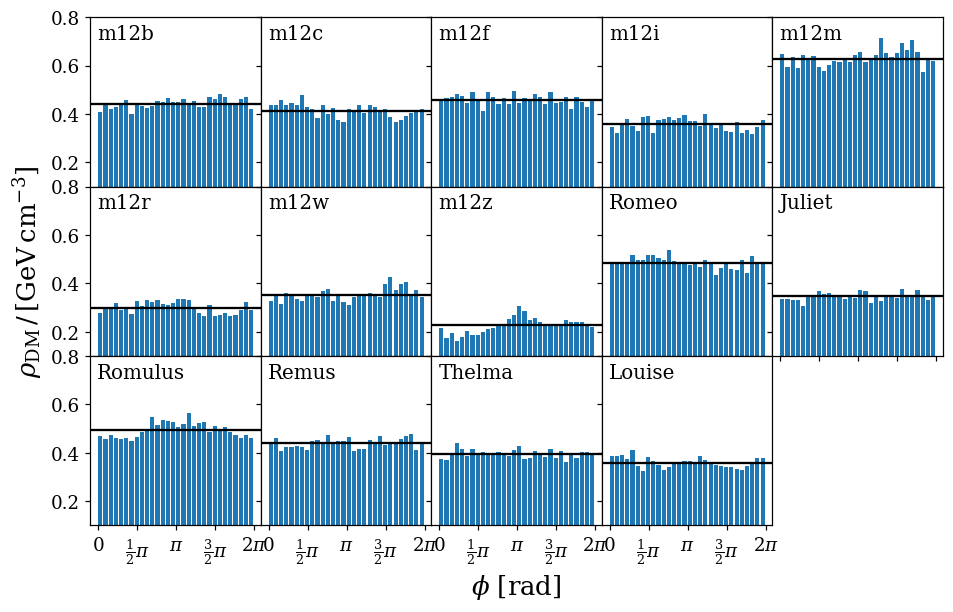

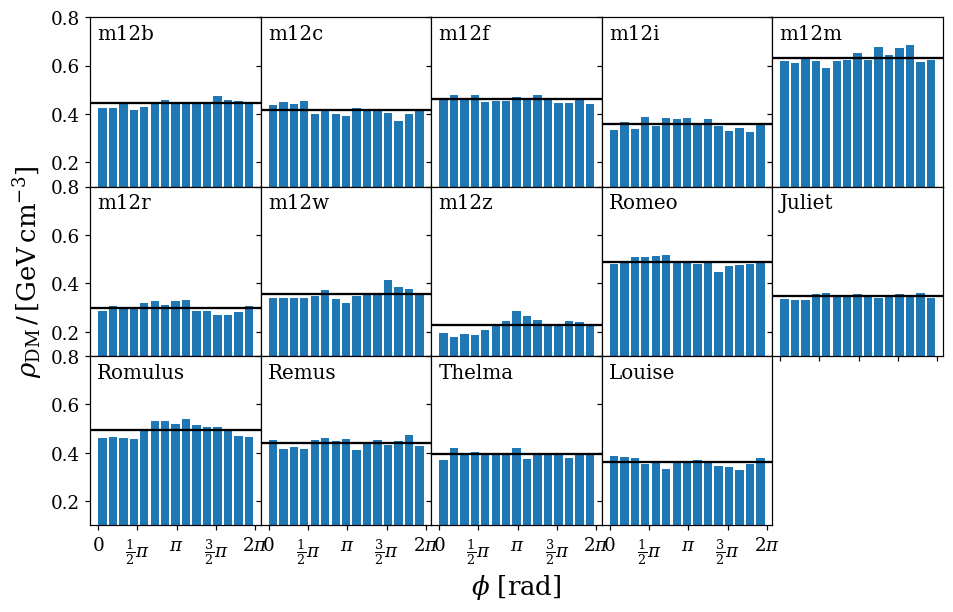

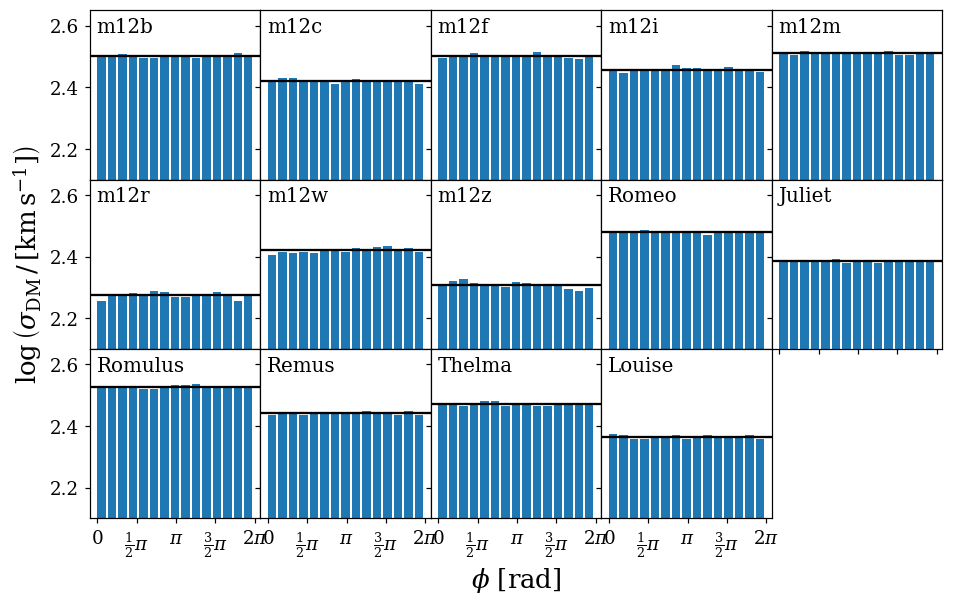

In [7]:
vs_phi('den', den_disp_dict_N30_dz1, 'dm_stats_dz1.0_20230724.h5')
vs_phi('den', den_disp_dict_N15_dz05, 'dm_stats_20220629.h5')
vs_phi('disp', den_disp_dict_N15_dz05, 'dm_stats_20220629.h5')

10.98% max den diff
4.70% max disp diff


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

0.71% max log den diff
0.92% max log disp diff


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

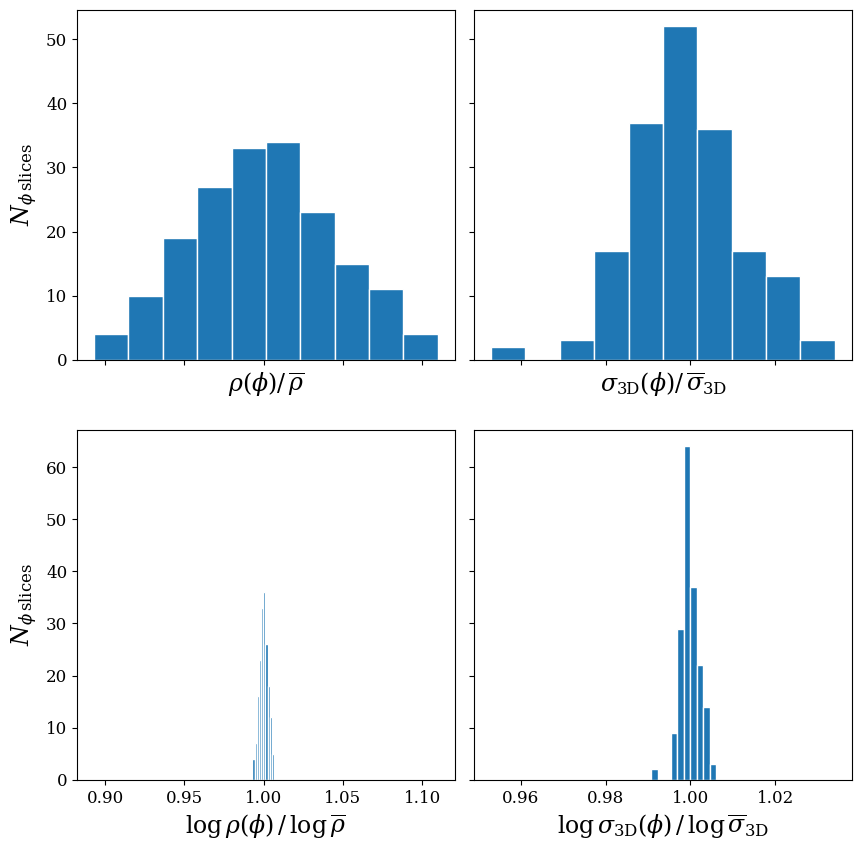

In [8]:
dm_den_viz.plt_disc_diffs(df_source='dm_stats_20221208.h5',
                          diff_source='den_disp_dict_N15_dz0.5_20230707.pkl')

# Testing different numbers of $\phi$ slices

## Using a 0.5 kpc thick disc

15 slices
3.48 kpc arclength slices
0.71% max log den diff
0.92% max log disp diff


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

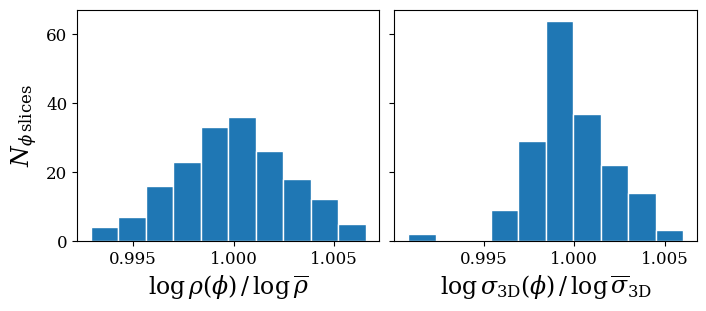

30 slices
1.74 kpc arclength slices
0.86% max log den diff
1.15% max log disp diff


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

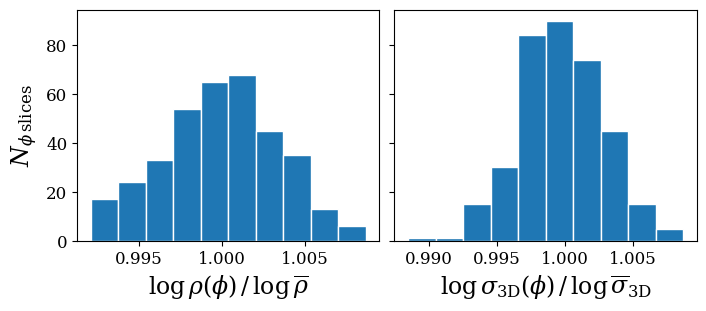

100 slices\0.52 kpc arclength slices
2.02% max log den diff
2.17% max log disp diff


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

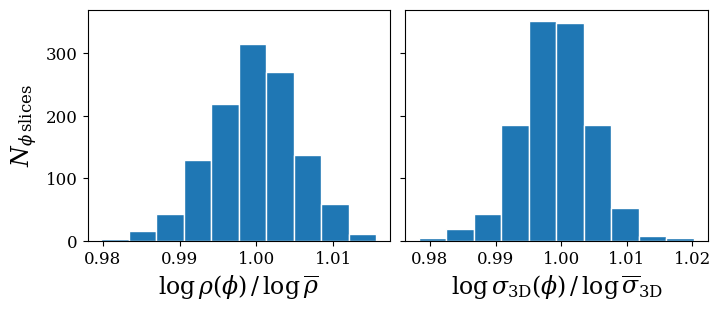

In [9]:
print('15 slices\n{0:0.2f} kpc arclength slices'.format(2.*np.pi/15.*8.3))
dm_den_viz.plt_disc_diffs(df_source='dm_stats_20221208.h5',
                          diff_source='den_disp_dict_N15_dz0.5_20230707.pkl',
                          only_log=True, figsize=(8,3),
                          tgt_fname=None,
                          update_val=False)
print('30 slices\n{0:0.2f} kpc arclength slices'.format(2.*np.pi*8.3/30.))
dm_den_viz.plt_disc_diffs(df_source='dm_stats_20221208.h5',
                          diff_source='den_disp_dict_N30_20220927.pkl',
                          only_log=True, figsize=(8,3),
                          tgt_fname=None,
                          update_val=False)
print('100 slices\{0:0.2f} kpc arclength slices'.format(2.*np.pi/100.*8.3))
dm_den_viz.plt_disc_diffs(df_source='dm_stats_20221208.h5',
                          diff_source='den_disp_dict_N100_20220927.pkl',
                          only_log=True, figsize=(8,3),
                          tgt_fname=None,
                          update_val=False)

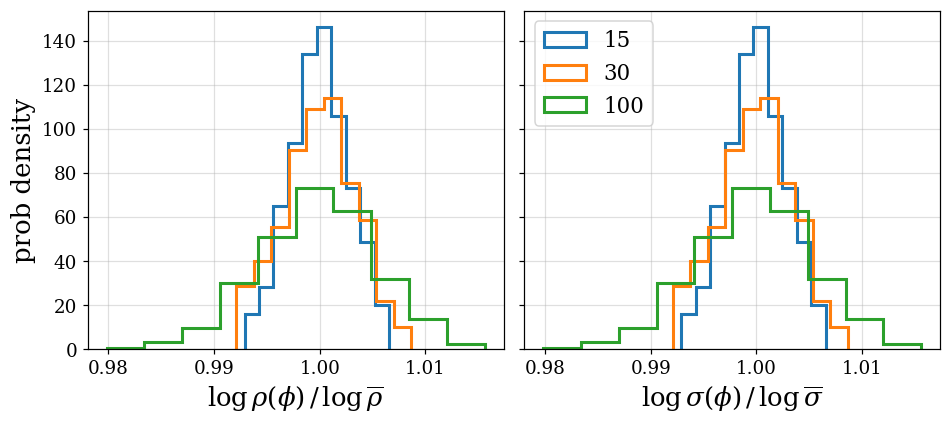

In [10]:
galnames = staudt_tools.init_df().drop(['m12z', 'm12w']).index
Nbins=10
lw=2.

fig, axs = plt.subplots(1, 2, figsize=(10,4), sharey=True, dpi=110.)
fig.subplots_adjust(wspace=0.05)
for N, fname in zip([15,30,100],
                    ['den_disp_dict_20220818.pkl',
                     'den_disp_dict_N30_20220927.pkl',
                     'den_disp_dict_N100_20220927.pkl']):
    with open('./data/'+fname, 'rb') as f:
        den_disp_dict = pickle.load(f)
    dens = np.array([den_disp_dict[galname]['log(dens)/log(avg)'] \
                     for galname in galnames]).flatten()
    disps = np.array([den_disp_dict[galname]['log(dens)/log(avg)'] \
                      for galname in galnames]).flatten()
    
    axs[0].hist(dens, Nbins, density=True, histtype='step', lw=lw)
    axs[1].hist(disps, Nbins, density=True, histtype='step', lw=lw, label=N)
axs[1].legend()
axs[0].set_ylabel('prob density')
axs[0].set_xlabel('$\log\\rho(\phi)\,/\,\log\overline{\\rho}$')
axs[1].set_xlabel('$\log\sigma(\phi)\,/\,\log\overline{\sigma}$')
for ax in axs:
    ax.grid(alpha=0.4)
plt.show()

100% |##########################################################################################################################################################################################################################|


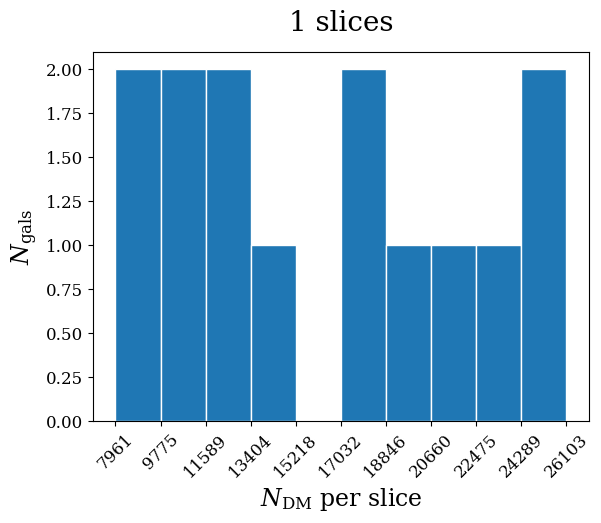

m12r has the least particles: 7961
shot noise = 1.1%
Romeo has the most particles: 26103
shot noise = 0.6%
m12m has the median number of particles: 18554
shot noise = 0.7%


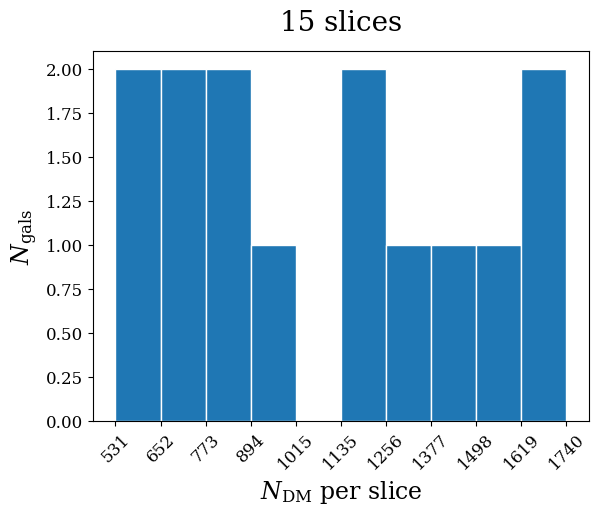

m12r has the least particles: 531
shot noise = 4.3%
Romeo has the most particles: 1740
shot noise = 2.4%
m12m has the median number of particles: 1237
shot noise = 2.8%


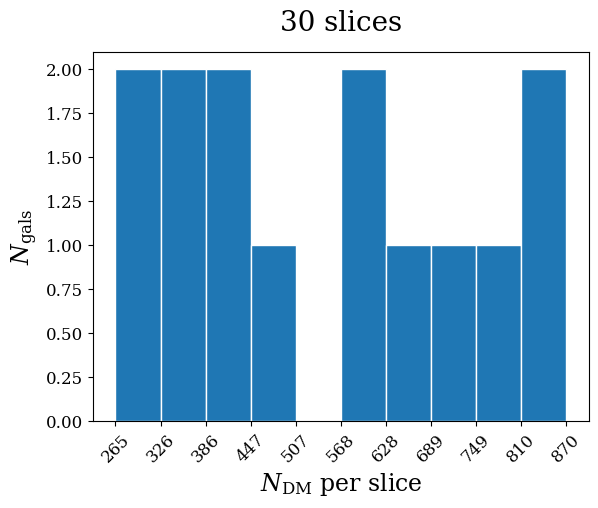

m12r has the least particles: 265
shot noise = 6.1%
Romeo has the most particles: 870
shot noise = 3.4%
m12m has the median number of particles: 618
shot noise = 4.0%


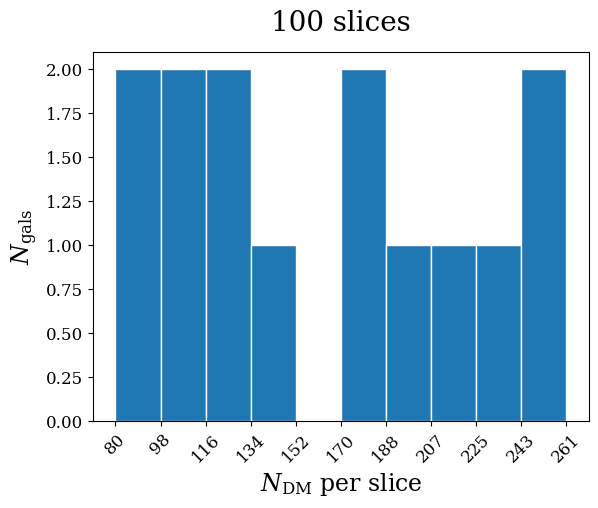

m12r has the least particles: 80
shot noise = 11.2%
Romeo has the most particles: 261
shot noise = 6.2%
m12m has the median number of particles: 186
shot noise = 7.3%


In [11]:
dm_den_viz.plt_particle_counts('dm_stats_20221208.h5')

## Using a 1.0 kpc thick disc

15 SLICES
3.48 kpc arclength slices
0.62% max log den diff
0.83% max log disp diff


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

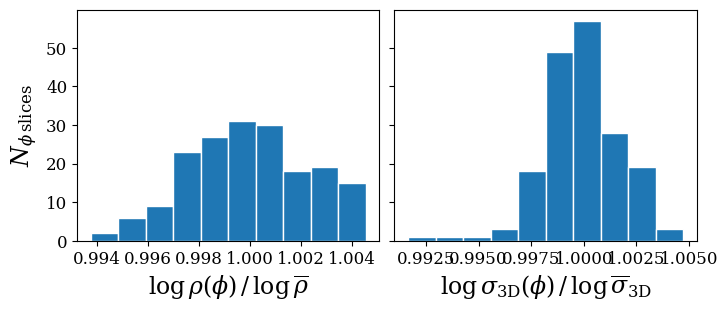

9.42% max den diff
4.28% max disp diff


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

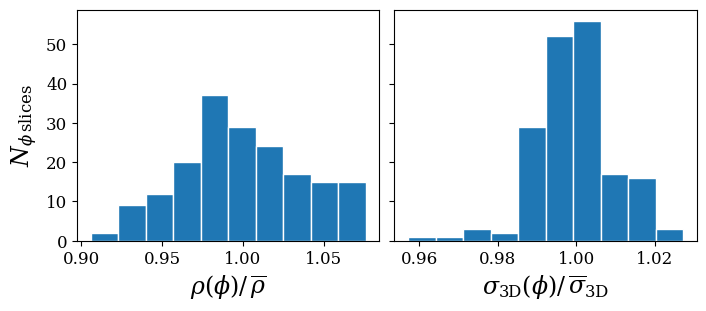


30 SLICES
1.74 kpc arclength slices
0.86% max log den diff
1.15% max log disp diff


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

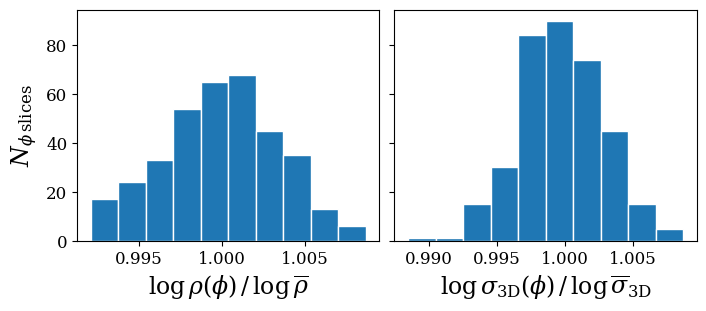

15.04% max den diff
5.86% max disp diff


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

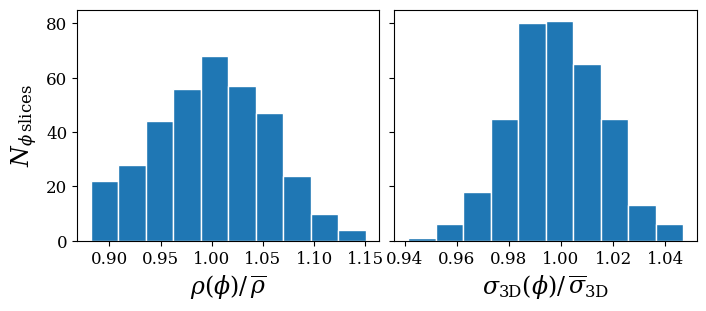

In [12]:
from importlib import reload
reload(dm_den_viz)
print('15 SLICES\n{0:0.2f} kpc arclength slices'.format(2.*np.pi*8.3/15.))
dm_den_viz.plt_disc_diffs('dm_stats_dz1.0_20230626.h5',
                          'den_disp_dict_N15_dz1.0_20230707.pkl',
                          only_log=True, figsize=(8,3),
                          tgt_fname=None,
                          update_val=False)
dm_den_viz.plt_disc_diffs('dm_stats_dz1.0_20230626.h5',
                          'den_disp_dict_N15_dz1.0_20230707.pkl',
                          only_linear=True, figsize=(8,3),
                          tgt_fname=None,
                          update_val=False)

print('\n30 SLICES\n{0:0.2f} kpc arclength slices'.format(2.*np.pi*8.3/30.))
dm_den_viz.plt_disc_diffs('dm_stats_dz1.0_20230626.h5',
                          'den_disp_dict_N30_dz1.0_20230707.pkl',
                          only_log=True, figsize=(8,3),
                          tgt_fname=None,
                          update_val=False)
dm_den_viz.plt_disc_diffs('dm_stats_dz1.0_20230626.h5',
                          'den_disp_dict_N30_dz1.0_20230707.pkl',
                          only_linear=True, figsize=(8,3),
                          tgt_fname=None,
                          update_val=False)

100% |##########################################################################################################################################################################################################################|


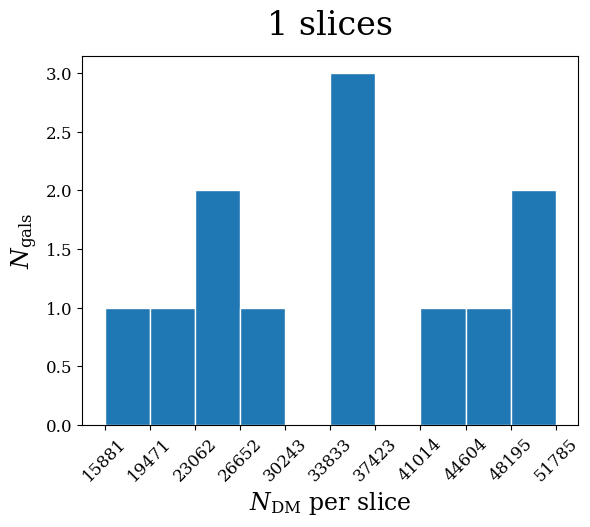

m12r has the least particles: 15881
shot noise = 0.8%
Romulus has the most particles: 51785
shot noise = 0.4%
Juliet has the median number of particles: 37337
shot noise = 0.5%


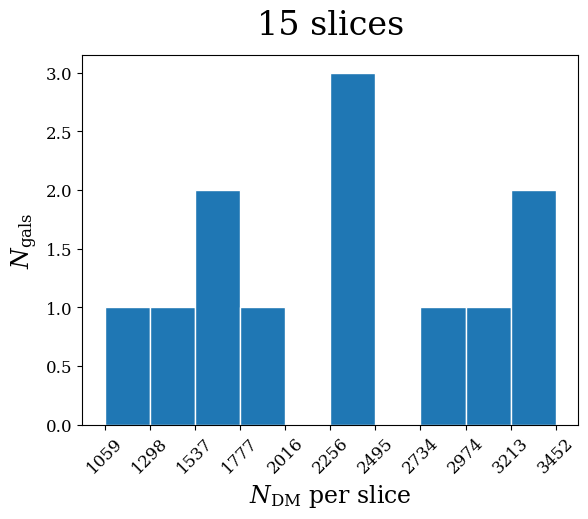

m12r has the least particles: 1059
shot noise = 3.1%
Romulus has the most particles: 3452
shot noise = 1.7%
Juliet has the median number of particles: 2489
shot noise = 2.0%


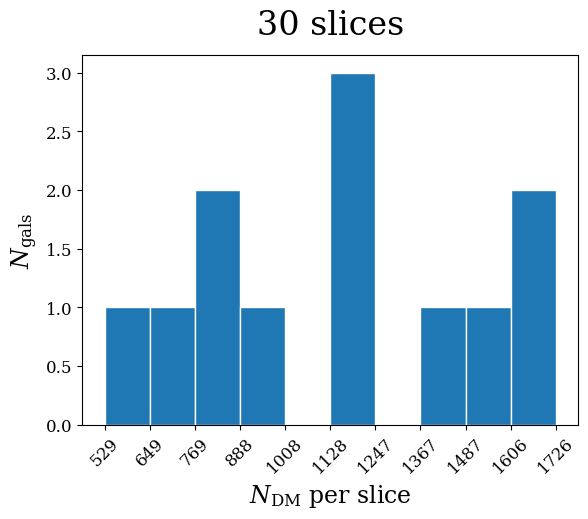

m12r has the least particles: 529
shot noise = 4.3%
Romulus has the most particles: 1726
shot noise = 2.4%
Juliet has the median number of particles: 1245
shot noise = 2.8%


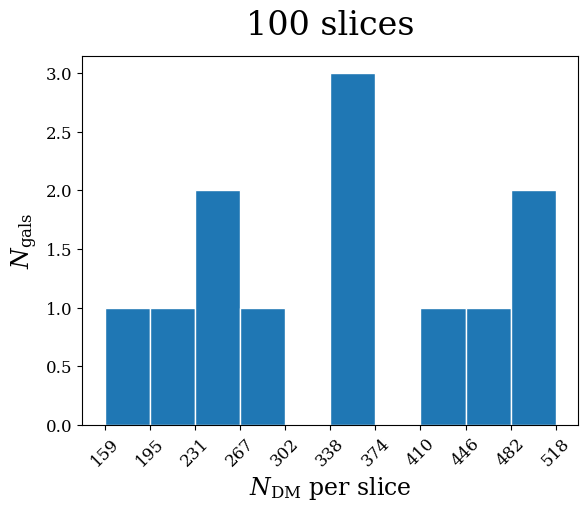

m12r has the least particles: 159
shot noise = 7.9%
Romulus has the most particles: 518
shot noise = 4.4%
Juliet has the median number of particles: 373
shot noise = 5.2%


In [13]:
reload(dm_den_viz)
dm_den_viz.plt_particle_counts('dm_stats_dz1.0_20230626.h5',
                               dropgals=['m12z', 'm12w'])